# Project: Writing a Data Scientist Blog Post

## Questions: about Seattle
1. Short-term rentals or longer-term rentals is the common rental in Seattle ?
2. What group of price is the common rental in Seattle ?
3. How a bout listings per host ? multiple listings or single listings is the common listing in Seattle ?

## Prepare data


### Gather necessary data to answer your questions

In [1]:
# Import necessaire 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) 
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Load data from local
df_listing = pd.read_csv('dataset/listings.csv')

### Handle categorical and missing data

In [3]:
df_listing.shape

(3585, 95)

In [4]:
#delete columns with null %100
df_listing = df_listing.dropna(axis = 1, how = 'all')
df_listing.shape

(3585, 91)

In [5]:
df_listing.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,NaN,NaN,f,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,10.0,9.0,9.0,f,t,moderate,f,f,1,1.3


In [6]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 91 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

- We need to change type:
      + id to object
      + last_scraped, calendar_last_scraped, first_review, last_review to datetime
      + maping host_is_superhost, host_identity_verified, requires_license, instant_bookable, require_guest_profile_picture, require_guest_phone_verification to bool

In [7]:
#fill null price,.. by 0
df_listing = df_listing.fillna({'price' : '0', 'weekly_price' : '0', 'monthly_price' : '0', 'security_deposit' : '0','cleaning_fee' : '0'})

#change type to float
cols_to_price = ['price','weekly_price','monthly_price','security_deposit','cleaning_fee']
for col in cols_to_price:
    df_listing[col] = df_listing[col].apply(lambda x : x.replace('$', ''))
    df_listing[col] = df_listing[col].apply(lambda x : x.replace(',', ''))
    df_listing[col] = df_listing[col].astype(float)


In [8]:
#maping {'f': False, 't': True}
booleanDictionary = {'f': False, 't': True}
df_listing['host_is_superhost'] = df_listing['host_is_superhost'].map(booleanDictionary)
df_listing['host_identity_verified'] = df_listing['host_identity_verified'].map(booleanDictionary)
df_listing['requires_license'] = df_listing['requires_license'].map(booleanDictionary)
df_listing['instant_bookable'] = df_listing['instant_bookable'].map(booleanDictionary)
df_listing['require_guest_profile_picture'] = df_listing['require_guest_profile_picture'].map(booleanDictionary)
df_listing['require_guest_phone_verification'] = df_listing['require_guest_phone_verification'].map(booleanDictionary)

#change type of date
df_listing['last_scraped'] = pd.to_datetime(df_listing['last_scraped'] )
df_listing['calendar_last_scraped'] = pd.to_datetime(df_listing['calendar_last_scraped'] )
df_listing['first_review'] = pd.to_datetime(df_listing['first_review'] )
df_listing['last_review'] = pd.to_datetime(df_listing['last_review'] )

# change type to boject
df_listing['id'] = df_listing['id'].astype('object')

#
df_listing['price'] = df_listing['price'].astype(int)
df_listing['weekly_price'] = df_listing['weekly_price'].astype(int)
df_listing['monthly_price'] = df_listing['monthly_price'].astype(int)
df_listing['security_deposit'] = df_listing['security_deposit'].astype(int)
df_listing['cleaning_fee'] = df_listing['cleaning_fee'].astype(int)


In [9]:
#check type of data
df_listing[['price', 'weekly_price', 'monthly_price', 'security_deposit','cleaning_fee',\
            'host_is_superhost', 'host_identity_verified', 'requires_license', 'instant_bookable',\
           'require_guest_profile_picture', 'require_guest_phone_verification', 'last_scraped',\
           'calendar_last_scraped', 'first_review', 'last_review', 'id']].dtypes

price                                        int32
weekly_price                                 int32
monthly_price                                int32
security_deposit                             int32
cleaning_fee                                 int32
host_is_superhost                             bool
host_identity_verified                        bool
requires_license                              bool
instant_bookable                              bool
require_guest_profile_picture                 bool
require_guest_phone_verification              bool
last_scraped                        datetime64[ns]
calendar_last_scraped               datetime64[ns]
first_review                        datetime64[ns]
last_review                         datetime64[ns]
id                                          object
dtype: object

### Provide insight into the methods you chose and why you chose them

I chose the CRISP-DM Process (Cross Industry Process for Data Mining) beacause:
This method help me even when we get into the weeds of coding, try to take a step back and realize what part of the process you are in, assure that you remember the question you are trying to answer, and what a solution to that question would look like.

## Analyze, Model, and Visualize

### Provide a clear connection between your business questions and how the data answers them


1. Short-term rentals or longer-term rentals is the common rental in Seattle ?
- we are interesting about: minimum_nights
2. What group of price is the common rental in Seattle ?
- we are interesting about: price
3. How a bout listings per host ? multiple listings or single listings is the common listing in Seattle ?
- we are interesting about: room_type, host_name 

#### 1. Short-term rentals or longer-term rentals is the common rental in Seattle ?

In [10]:
df_listing['minimum_nights'].value_counts().reset_index().sort_values(by='index')

,index,minimum_nights
0,1,1426
1,2,998
2,3,615
3,4,126
5,5,95
10,6,18
4,7,124
26,8,1
19,9,2
6,10,65


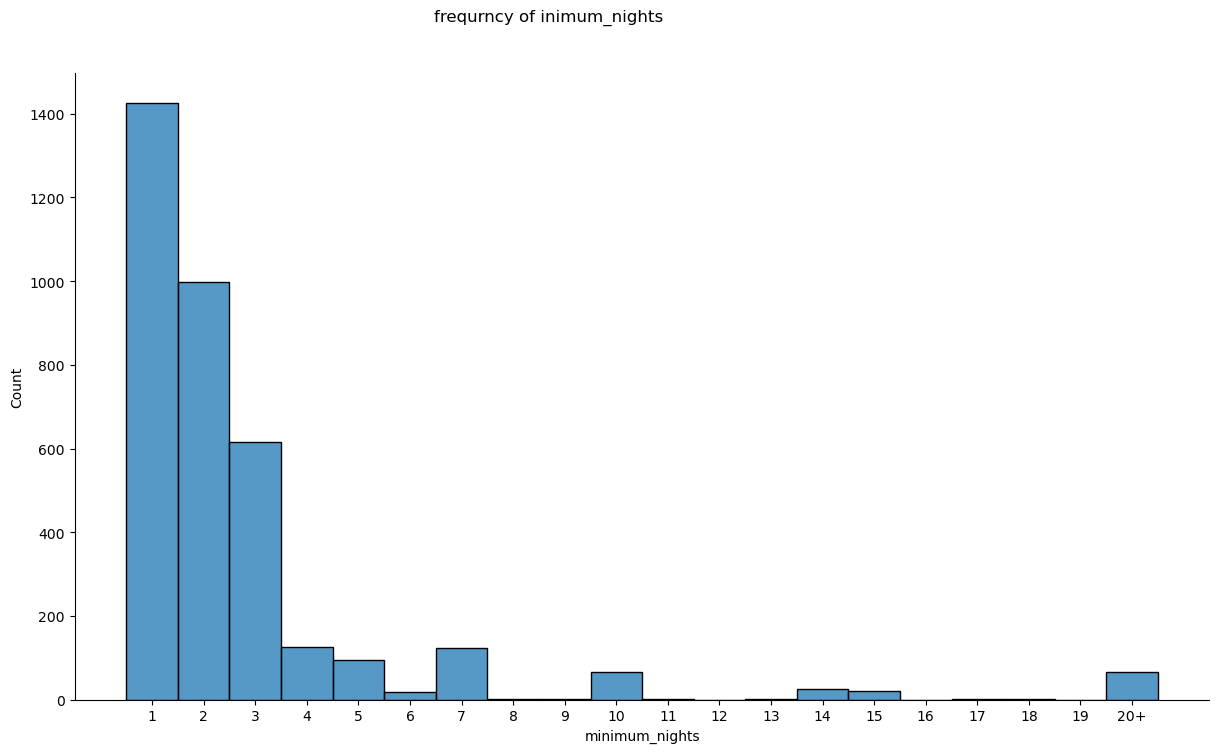

In [11]:
#chart
default_color = sns.color_palette()[0]
maxv = 20
f = sns.displot(np.clip(df_listing['minimum_nights'], 0, maxv+1), binwidth = 1, color = default_color );
f.ax.set_xticks(np.arange(1, maxv+1) + 0.5);
f.ax.set_xticklabels(np.arange(1, maxv).tolist() + [f'{maxv}+']);
f.fig.set_figwidth(14);
f.fig.set_figheight(8);
f.fig.subplots_adjust(top=.9);
f.fig.suptitle('frequrncy of inimum_nights ');

#### Observations:
- A lot of listing have minimum night are one night in seattle
  -> Short-term rentals is the common rental in Seattle

#### 2. What group of price is the common rental in Seattle ?

In [12]:
# Devide price into group of price with step of 100$
df_price = pd.cut(df_listing['price'], bins = range(0, df_listing['price'].max(), 100)).reset_index()
df_price = df_price['price'].value_counts().reset_index()
df_price.columns = ['Price', 'Count']
df_price = df_price[df_price.Count != 0]
df_price = df_price.sort_values(by='Price')
df_price['Price'] = df_price['Price'].astype(object)
df_price

,Price,Count
1,"(0, 100]",1252
0,"(100, 200]",1337
2,"(200, 300]",648
3,"(300, 400]",222
4,"(400, 500]",60
5,"(500, 600]",28
6,"(600, 700]",17
8,"(700, 800]",5
11,"(800, 900]",2
9,"(900, 1000]",4


In [13]:
maxn = 6
index_last = '(500, 600+)'
col_x = 'Price'
col_y = 'Count'

df_price_chart = df_price[:maxn]
df_price_chart['index'] = list(range(0,len(df_price_chart)));
df_price_chart = df_price_chart.set_index('index')
df_price_chart.loc[maxn-1,col_x] = index_last
df_price_chart.loc[maxn-1,col_y] = df_price[maxn-1:].sum().values[0];


C:\Users\P.Q.TRI\AppData\Local\Temp\ipykernel_4200\3816566126.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_price_chart['index'] = list(range(0,len(df_price_chart)));
C:\Users\P.Q.TRI\AppData\Local\Temp\ipykernel_4200\3816566126.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_price_chart.loc[maxn-1,col_y] = df_price[maxn-1:].sum().values[0];


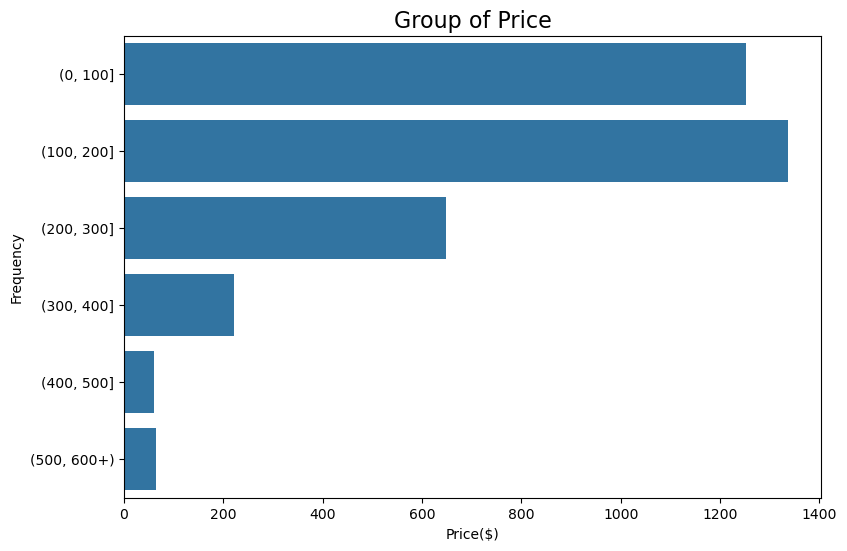

In [14]:
#Chart
default_color = sns.color_palette()[0]
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.barplot(y = "Price", x = "Count", data = df_price_chart, color = default_color)
plt.xlabel("Price($)")
plt.ylabel("Frequency")
plt.title("Group of Price", fontsize = 16)
plt.show();

#### Observations:
- The group of price is the common rental in Seattle is from 100dola to 200dola

#### 3. How a bout listings per host ? multiple listings or single listings is the common listing in Seattle ?

In [15]:
#Group data by host_name and room_type
df_host_group = df_listing.groupby(by = ['host_name','room_type'], as_index= False ).count().sort_values(by='id', ascending = False)
df_host = df_host_group[['host_name','room_type','id']]

# pivot table to have room_type like column
df_host_pivot = pd.pivot_table(df_host, values='id', index=['host_name'],
                    columns=['room_type'], aggfunc=np.sum)
df_host_pivot = df_host_pivot.reset_index()
df_host_pivot = df_host_pivot.fillna({'Entire home/apt':0,'Private room':0,'Shared room':0})
df_host_pivot['Entire home/apt'] = df_host_pivot['Entire home/apt'].astype(int)
df_host_pivot['Private room'] = df_host_pivot['Private room'].astype(int)
df_host_pivot['Shared room'] = df_host_pivot['Shared room'].astype(int)


# Cancule total of number listing of one host_name
df_host_pivot['Total'] = df_host_pivot['Entire home/apt']+ df_host_pivot['Private room']+ df_host_pivot['Shared room']
df_host_pivot = df_host_pivot.sort_values(by='Total', ascending = False)
df_host_pivot.head(10)


room_type,host_name,Entire home/apt,Private room,Shared room,Total
650,Kara,137,1,0,138
1116,Seamless,76,3,0,79
879,Mike,69,2,0,71
405,Flatbook,58,0,0,58
50,Alicia,48,2,0,50
824,Marie,16,26,0,42
546,Jason,24,9,2,35
1289,Will,20,6,0,26
1112,Sarah,15,11,0,26
1164,Stay Alfred,25,0,0,25


In [16]:
df_host_chart = df_host_pivot[['host_name', 'Entire home/apt', 'Private room', 'Shared room']][:10]

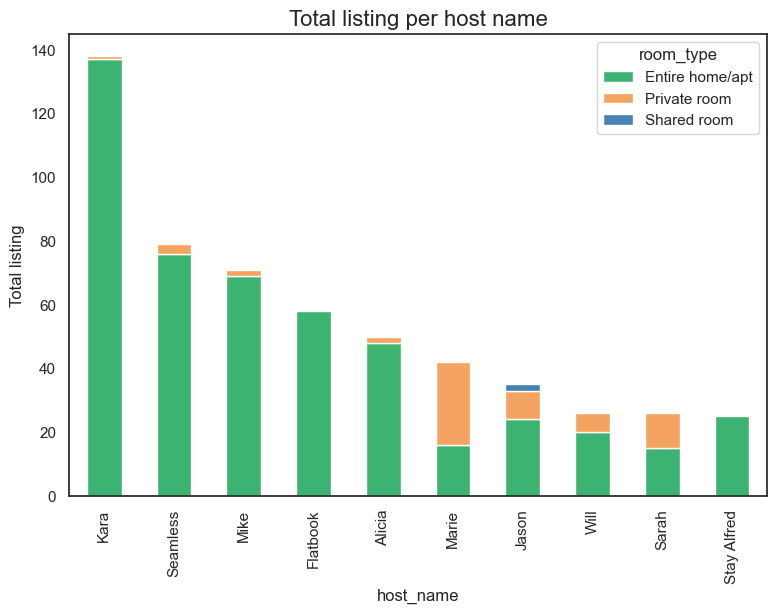

In [27]:
sns.set(style = 'white')
df_host_chart.set_index('host_name').plot(kind='bar', stacked = True, figsize=(9, 6), color = ['MediumSeaGreen', 'SandyBrown','steelblue'])
plt.xlabel("host_name")
plt.ylabel("Total listing")
plt.title("Total listing per host name", fontsize = 16)

plt.show();

#### Observations:
- There are some host have multiple apartments or homes available in their entirity like Kara, Sseamless

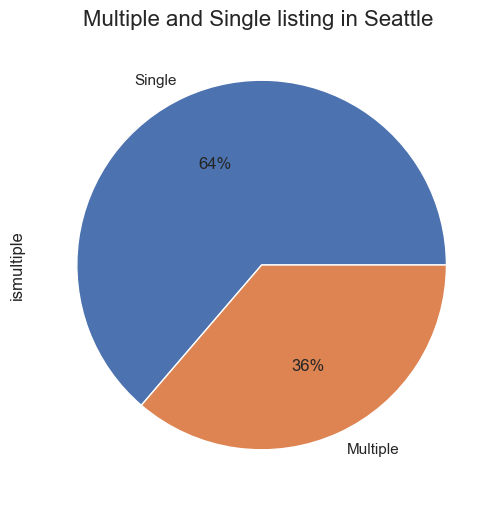

In [29]:
# create column is multiple
df_host_pivot['ismultiple'] = np.where(df_host_pivot['Total'] > 1, 'Multiple', 'Single')

#Chart ratio of is multiple
df_host_pivot['ismultiple'].value_counts().plot(kind='pie', figsize=(6, 6), autopct = '%1.0f%%');

plt.title("Multiple and Single listing in Seattle ", fontsize = 16);
plt.show();

#### Observations:
- There are a lot of host separate rooms in the same apartment (64% listing) in  Seattle